<a href="https://colab.research.google.com/github/Aditya-Raj-Kaushik/CuraSphere/blob/main/Multi_Output_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy for Output 1: 0.8125
Accuracy for Output 2: 0.3175


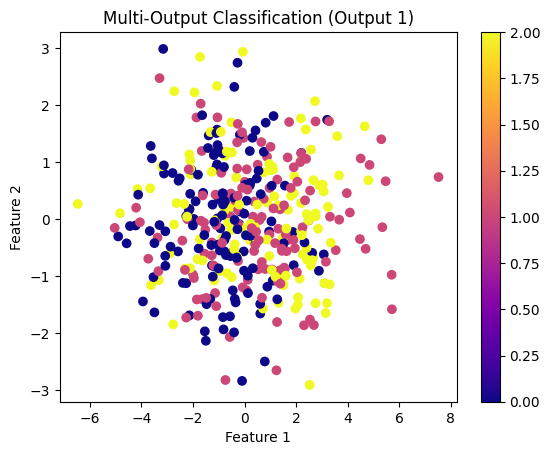

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create a dataset with two different target outputs
X, y1 = make_classification(n_samples=1000, n_features=20, n_classes=3,
                             n_informative=5, random_state=42)
_, y2 = make_classification(n_samples=1000, n_features=20, n_classes=3,
                             n_informative=5, random_state=43)

# Combine y1 and y2 to form multi-output labels
y = np.vstack((y1, y2)).T

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the model
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy for each output
accuracy_1 = accuracy_score(y_test[:, 0], y_pred[:, 0])
accuracy_2 = accuracy_score(y_test[:, 1], y_pred[:, 1])
print(f"Accuracy for Output 1: {accuracy_1}")
print(f"Accuracy for Output 2: {accuracy_2}")

# Plot for the first output prediction
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred[:, 0], cmap='plasma')
plt.title('Multi-Output Classification (Output 1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
